Hello Nicholas!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure!

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# **🎥 Film Junky Union 🎥**

## **Project Description**
The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to reach an F1 score of at least 0.85.

### **Project Instructions**
  1. Load the data
  2. Pre-process the data
  3. Conduct an EDA and make your conclusion on the class imbalance
  4. Pre-process the data for modeling
  5. Train at least three different models for the given train dataset
  6. Test the models for the given test dataset
  7. Compose a few of your own reviews and classify them with all the models
  8. Check for differences between the testing results of models in the above two points. Try to explain them.
  9. Present your findings

# **Initialization**

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import re

from sklearn.dummy import DummyClassifier

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import torch
import transformers

from lightgbm import LGBMClassifier

from tqdm import tqdm

import string

In [2]:
%matplotlib inline # This is a magic command that tells Jupyter to display Matplotlib plots inline within the notebook, directly below the code cells that produce them. This means that when you create a plot, it will appear in the notebook instead of in a separate window.

%config InlineBackend.figure_format = 'png' # This line configures the inline backend to render figures in PNG format. PNG is a raster graphics format that is widely supported and provides a good balance of quality and file size for most plots.

%config InlinBackend.figure_format = 'retina' #

plt.style.use('seaborn')

UsageError: unrecognized arguments: # This is a magic command that tells Jupyter to display Matplotlib plots inline within the notebook, directly below the code cells that produce them. This means that when you create a plot, it will appear in the notebook instead of in a separate window.


In [3]:
tqdm.pandas()

# **Load Data**

In [4]:
df_reviews = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
print(df_reviews.head(10))

print(df_reviews.info())

display(df_reviews.describe())

      tconst title_type                                      primary_title  \
0  tt0068152      movie                                                  $   
1  tt0068152      movie                                                  $   
2  tt0313150      short                                               '15'   
3  tt0313150      short                                               '15'   
4  tt0313150      short                                               '15'   
5  tt0313150      short                                               '15'   
6  tt0313150      short                                               '15'   
7  tt0035958      movie  'Gung Ho!': The Story of Carlson's Makin Islan...   
8  tt0035958      movie  'Gung Ho!': The Story of Carlson's Makin Islan...   
9  tt0035958      movie  'Gung Ho!': The Story of Carlson's Makin Islan...   

                                      original_title  start_year end_year  \
0                                                  $        1971

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


## **Exploratory Data Analysis**

Let's check the number of movies and reviews over years

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movies with the exact counting and KDE

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

In [ ]:
df_reviews['pos'].value_counts()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

Distribution of negative and positive reviews over the years for two parts of the dataset

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

In [ ]:
# Class imbalance time

class_distribution1 = df_reviews['tconst'].value_counts()
print(class_distribution1)

class_distribution2 = df_reviews['title_type'].value_counts()
print(class_distribution2)

class_distribution3 = df_reviews['primary_title'].value_counts()
print(class_distribution3)

class_distribution4 = df_reviews['original_title'].value_counts()
print(class_distribution4)

class_distribution5 = df_reviews['end_year'].value_counts()
print(class_distribution5)

class_distribution6 = df_reviews['runtime_minutes'].value_counts()
print(class_distribution6)

class_distribution7 = df_reviews['genres'].value_counts()
print(class_distribution7)

class_distribution8 = df_reviews['review'].value_counts()
print(class_distribution8)

class_distribution9 = df_reviews['sp'].value_counts()
print(class_distribution9)

class_distribution10 = df_reviews['ds_part'].value_counts()
print(class_distribution5)

**Commentary:**

## **Evaluation Procedure**

Composing an evaluation routine which can be used for all models in this project

In [6]:
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## **Normalization**

We assume all models below except texts in lowercase and without any digits, punctuations, etc.

In [7]:
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Good job!

</div>

## **Train-Test Split**

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [8]:
# Initialize the OrdinalEncoder for start_year and end_year
ordinal_encoder = OrdinalEncoder()

# Fit and transform the start_year and end_year columns
df_reviews[['start_year', 'end_year']] = ordinal_encoder.fit_transform(df_reviews[['start_year', 'end_year']])

# Initialize the LabelEncoder for genres
label_encoder_genres = LabelEncoder()

# Fit and transform the genres column
df_reviews['genres'] = label_encoder_genres.fit_transform(df_reviews['genres'])

# Initialize the LabelEncoder for title_type
label_encoder_title_type = LabelEncoder()

# Fit and transform the title_type column
df_reviews['title_type'] = label_encoder_title_type.fit_transform(df_reviews['title_type'])

df_reviews['primary_title'] = df_reviews['primary_title'].str.replace("'", "")
df_reviews['original_title'] = df_reviews['original_title'].str.replace("'", "")

print(df_reviews)

          tconst  title_type                 primary_title  \
0      tt0068152           0                             $   
1      tt0068152           0                             $   
2      tt0313150           1                            15   
3      tt0313150           1                            15   
4      tt0313150           1                            15   
...          ...         ...                           ...   
47326  tt0068398           2                Étude in Black   
47327  tt0223503           4  Îhatôbu gensô: KENjI no haru   
47328  tt0223503           4  Îhatôbu gensô: KENjI no haru   
47329  tt0223503           4  Îhatôbu gensô: KENjI no haru   
47330  tt0223503           4  Îhatôbu gensô: KENjI no haru   

                     original_title  start_year  end_year runtime_minutes  \
0                                 $        67.0      59.0             121   
1                                 $        67.0      59.0             121   
2                       

In [9]:
# Ensure that the NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load the stop words and lemmatizer from NLTK
nltk_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Define a text preprocessing function using NLTK without lemmatization
def preprocess_text_nltk(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in nltk_stopwords]
    return ' '.join(filtered_tokens)

df_reviews['processed_review_nltk'] = df_reviews['review'].apply(preprocess_text_nltk)

In [11]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

df_reviews_train.drop(columns=['tconst'], inplace=True)
df_reviews_test.drop(columns=['tconst'], inplace=True)

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

<div class="alert alert-danger">
<b>Reviewer's comment V3</b>

Broken code. Please, before to send the project back be sure that all the code works fine.

</div>


<div class="alert alert-info">
<b>Student's comment V3</b>
    
Sure. It was working smoothly when I submitted it through this point. I resolved the issue through additional preprocessing four cells above.
    
</div>

In [12]:
# Create a TfidfVectorizer object using NLTK stop words
vectorizer_nltk = TfidfVectorizer(stop_words=nltk_stopwords)

# Fit the vectorizer to the processed reviews and transform the data
# Note: You should fit the vectorizer on the training data only
vectorizer_nltk.fit(df_reviews_train['processed_review_nltk'])

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [13]:
# Transform the reviews into TF-IDF features
train_features_nltk = vectorizer_nltk.transform(df_reviews_train['processed_review_nltk'])
test_features_nltk = vectorizer_nltk.transform(df_reviews_test['processed_review_nltk'])

print(df_reviews_train.shape)
print(df_reviews_test.shape)
print()
print(train_features_nltk.shape)
print(test_features_nltk.shape)

(23796, 17)
(23535, 17)

(23796, 70055)
(23535, 70055)


## **Working the Models**

### **Model 0 – Constant**

In [ ]:
features = df_reviews_train.drop(columns=['pos', 'ds_part'])
test_features_dummy = df_reviews_test.drop(columns=['pos', 'ds_part'])

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(features, train_target)

evaluate_model(dummy_clf, features, train_target, test_features_dummy, test_target)

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

### **Model 1 – NLTK, TF-IDF and LR**

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


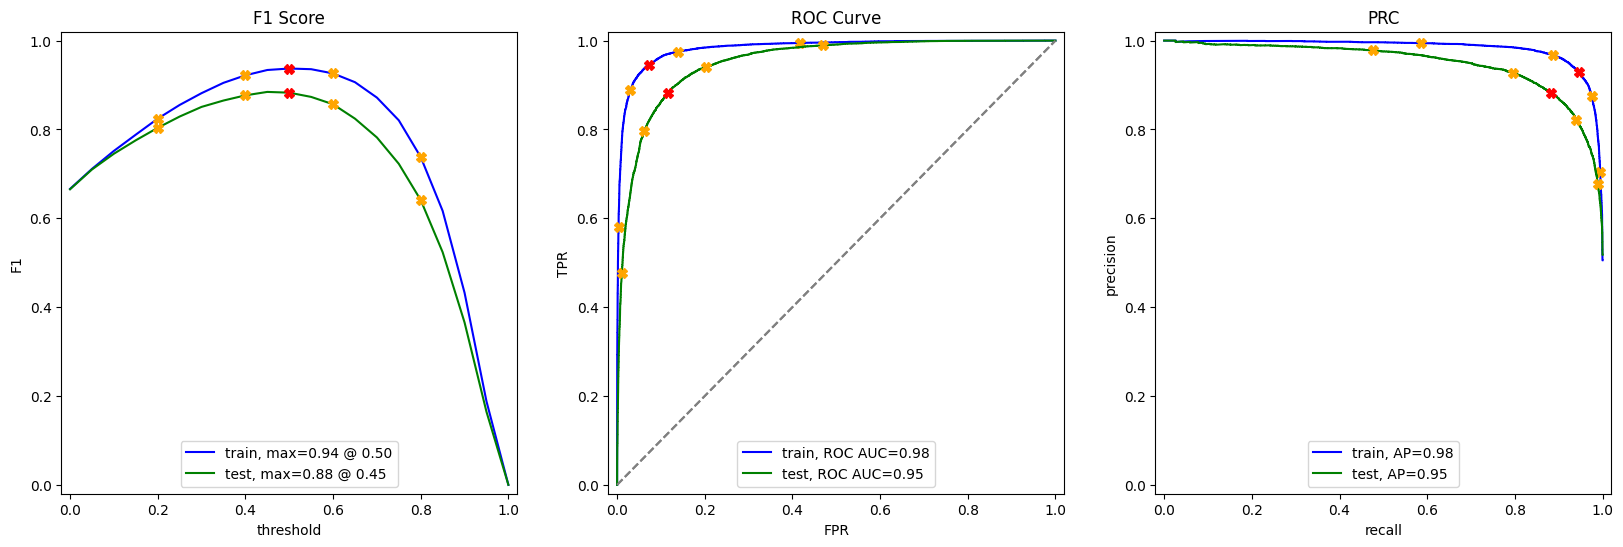

In [14]:
# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(train_features_nltk, train_target)

# Now you can use the evaluate_model function to evaluate the model
evaluate_model(model_lr, train_features_nltk, train_target, test_features_nltk, test_target)

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. In this task you shouldn't use spacy for lemmatization. You don't need to lemmatize texts here at all.
2. You should use stop words from NLTK in the TfidfVectorizer.
3. You have a lot of duplicate code here. You shouldn't read the data and split it again. You need to use results from previous cells.
4. You should use 'review_norm' column here from previous tasks.
5. Why did you add all the imports again? All the imports should be used only once in the project

</div>

<div class="alert alert-info">
<b>Student's comment V1</b>
    
Addressed the first and second points. On the third point, for some reason, when I don't preprocess the training and test sets as well split again, the code has trouble running – even when testing these two separately. For the fourth point, I decided to go with 'processed_review' instead of 'review_norm'. Lastly, I moved the imports up to the initialization section.
    
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

1. You have a lot of duplicate code how. You should read the data only once. You should split the data only once and so on. All these things were done above and so you shouldn' repeat them here. 
2. You don't need to do a lemmatization here at all. Just use a column a 'review_norm' from section 4. The only thing you should take from NLTK libary is stopwords. 
    
</div>

<div class="alert alert-info">
<b>Student's comment V2</b>
    
Addressed. Thanks.
    
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V4</b>

Another broken code. Please, before to send the project back be sure that all the code works fine.
    
</div>

<div class="alert alert-info">
<b>Student's comment V4</b>
    
Yes. The target variable in the dummy classifier was overwriting the pre-processing code that I put in for the last V3 comment. It works now.

</div>

### **Model 3 – spaCy, TF-IDF and LR**

In [15]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define a text preprocessing function using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

df_reviews['processed_review_spacy'] = df_reviews['review'].apply(preprocess_text_spacy)

In [18]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

df_reviews_train.drop(columns=['tconst'], inplace=True)
df_reviews_test.drop(columns=['tconst'], inplace=True)

df_reviews_train_spacy = df_reviews_train.drop(columns=['processed_review_nltk'])
df_reviews_test_spacy = df_reviews_test.drop(columns=['processed_review_nltk'])

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.94
ROC AUC    0.98  0.95


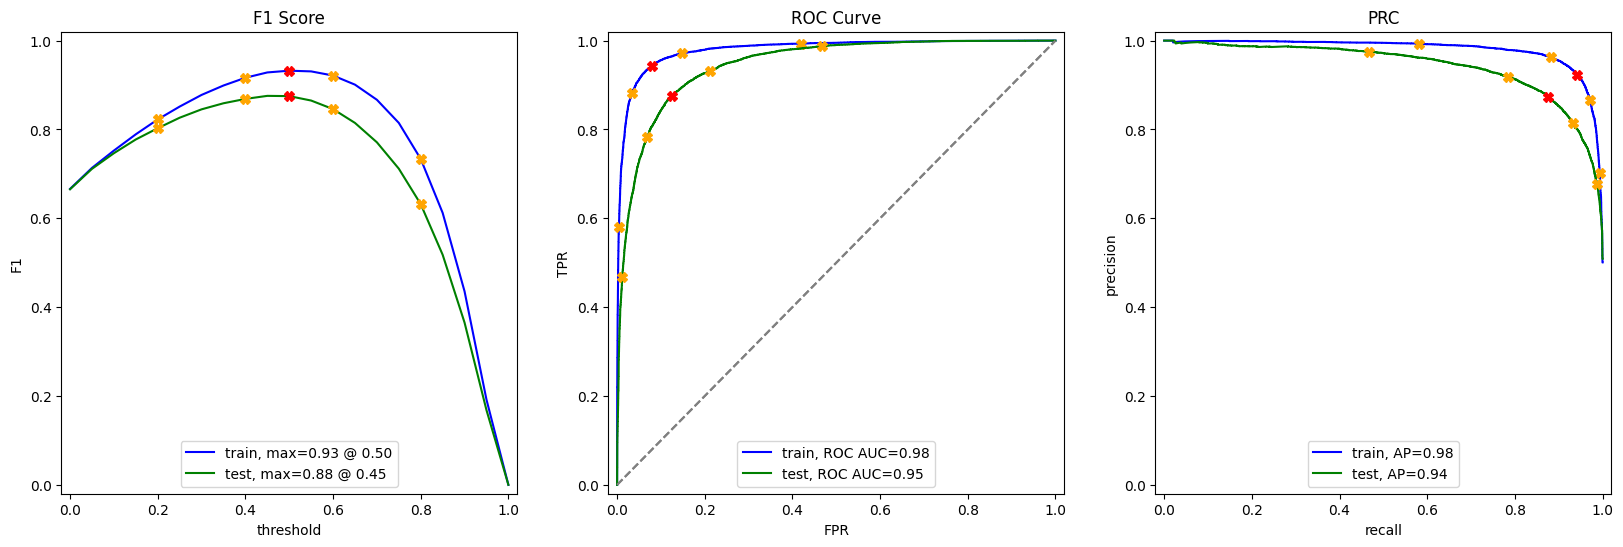

In [19]:
# Create a TfidfVectorizer object
vectorizer_spacy = TfidfVectorizer()

# Fit the vectorizer to the processed reviews in the training set
vectorizer_spacy.fit(df_reviews_train_spacy['processed_review_spacy'])

# Transform the reviews into TF-IDF features
train_features_spacy = vectorizer_spacy.transform(df_reviews_train_spacy['processed_review_spacy'])
test_features_spacy =  vectorizer_spacy.transform(df_reviews_test_spacy['processed_review_spacy'])

# Initialize and train the Logistic Regression model
model_lr_spacy = LogisticRegression()
model_lr_spacy.fit(train_features_spacy, train_target)

# Now you can use the evaluate_model function to evaluate the model
evaluate_model(model_lr_spacy, train_features_spacy, train_target, test_features_spacy, test_target)

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. You should use stop words from NLTK in the TfidfVectorizer.
2. You have a lot of duplicate code here. You shouldn't read the data and split it again. You need to use results from previous cells.
3. You should use 'review_norm' column here from previous tasks.
4. Why did you add all the imports again? All the imports should be used only once in the project

</div>

<div class="alert alert-info">
<b>Student's comment V1</b>
    
Addressed the first point. On the second point, for some reason, when I don't preprocess the training and test sets as well split again, the code has trouble running – even when testing these two separately. For the third point, I decided to go with 'processed_review' instead of 'review_norm'. Lastly, I moved the imports up to the initialization section.
    
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

1. You have a lot of duplicate code how. You should read the data only once. You should split the data only once and so on. All these things were done above and so you shouldn' repeat them here. 
2. You should apply your `preprocess_text` function to the column 'review_norm' from the section 4.
    
</div>

<div class="alert alert-info">
<b>Student's comment V2</b>
    
Addressed. Thanks.
    
</div>    

<div class="alert alert-danger">
<b>Reviewer's comment V5</b>

Another broken code. It seems you fixed only the previous broken cell and didn't run the rest of the code. Please, could you run it untill the end? If you're going to send one broken cell by one we need a month to finish your review.

</div>

<div class="alert alert-info">
<b>Student's comment V5</b>

Thanks for your patience. I am not having this issue. The code is running just fine. The results for model_lr_spacy are           train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95
    
Your comments about the number of reviews is noted, however there was little to no actual direction on the base notebook this time, so I believe that we have actually made a lot of progress making it through the next section successfully. I'm not sure if you have made very small changes of the code when running it, but I will have to save drafts of the workbook moving forward. 
    
Please note that the notebook still crashes for model9, but if I restart the notebook and only run the import, preprocessing, and model9, then it produces results. You have noted this as correct previously and this still works in the other IDE without crashing.
    
Again, a sincere thanks for your review. If there's still issues other than broken code, I will go see the tutor about the dead kernel.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V6</b>

This time this cell works fine. 
Let's forget about BERT section. I changed the cell types in this section. Now this section won't spoil anything.
    
</div>

### **Model 4 – spaCy, TF-IDF, LGBMClassifier**

In [22]:
!pip install lightgbm

          train  test
Accuracy   0.91  0.85
F1         0.91  0.85
APS        0.97  0.93
ROC AUC    0.97  0.93


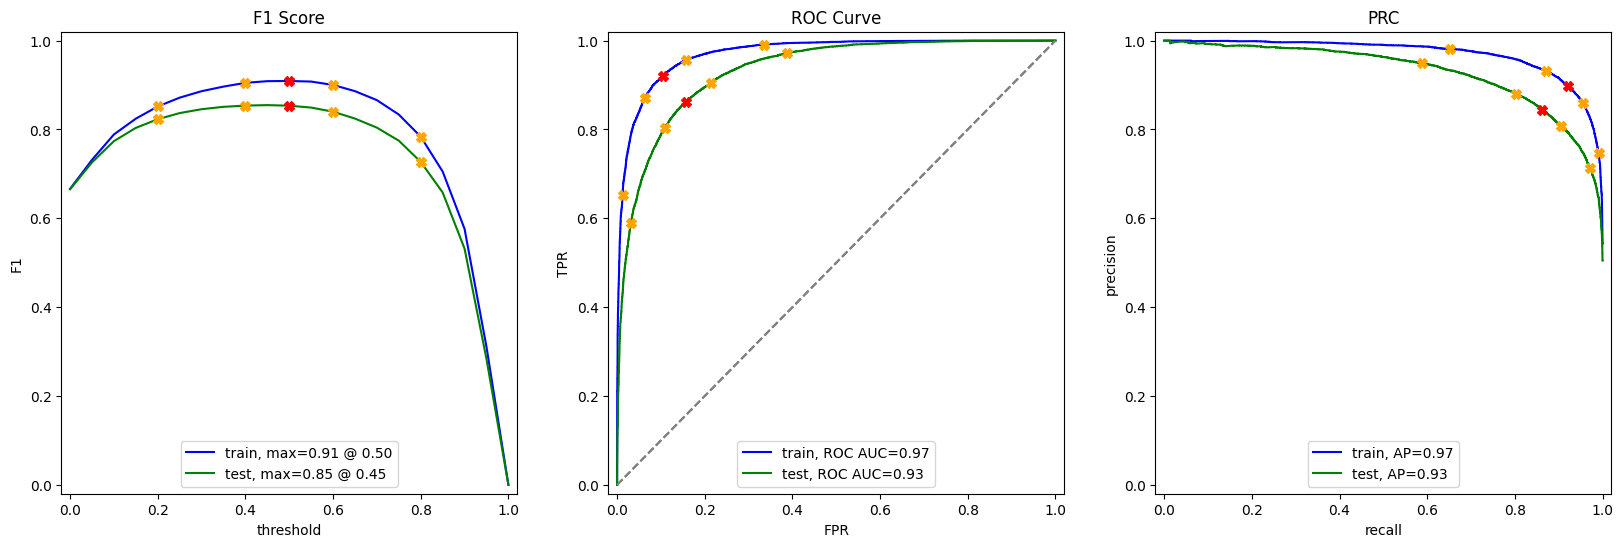

In [23]:
# Initialize and train the LGBMClassifier model
model_lgbm = LGBMClassifier()
model_lgbm.fit(train_features_spacy, train_target)

# Now you can use the evaluate_model function to evaluate the model
evaluate_model(model_lgbm, train_features_spacy, train_target, test_features_spacy, test_target)

### **Model 9 – BERT**

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

Correct

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

1. Why did you load and split the data again? You should do it only once in your whole project.
2. Why did you add all the imports again? All the imports should be used only once in the project

</div>

<div class="alert alert-info">
<b>Student's comment V1</b>
    
Addressed. Thanks.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Correct
    
</div>

## **My Reviews**

In [24]:
# Sample DataFrame creation for demonstration
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie. This movie was poopie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie, but it was still kind of poopie.',
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

# Apply the normalization function to the 'review' column
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)

# Display the normalized reviews
print(my_reviews)

                                              review  \
0  I did not simply like it, not my kind of movie...   
1  Well, I was bored and felt asleep in the middl...   
2  I was really fascinated with the movie, but it...   
3  Even the actors looked really old and disinter...   
4  I didn't expect the reboot to be so good! Writ...   
5  The movie had its upsides and downsides, but I...   
6  What a rotten attempt at a comedy. Not a singl...   
7  Launching on Netflix was a brave move & I real...   

                                         review_norm  
0  i did not simply like it not my kind of movie ...  
1  well i was bored and felt asleep in the middle...  
2  i was really fascinated with the movie but it ...  
3  even the actors looked really old and disinter...  
4  i didnt expect the reboot to be so good writer...  
5  the movie had its upsides and downsides but i ...  
6  what a rotten attempt at a comedy not a single...  
7  launching on netflix was a brave move i really...  


<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Duplicate code for the function `normalize_text`

</div>

<div class="alert alert-info">
<b>Student's comment V1</b>
    
I need to have this here to complete the assignment because the kernel dies.
    
</div>

### **Model 1**

In [28]:
# Fit the vectorizer to the processed reviews in the training set
vectorizer_nltk.fit(df_reviews_train['processed_review_nltk'])

# Transform the normalized and processed reviews into TF-IDF features
my_reviews_features_nltk = vectorizer_nltk.transform(my_reviews['review_norm'])

# Predict probabilities for the new reviews using model1
my_reviews_pred_prob_model_lr_nltk = model_lr.predict_proba(my_reviews_features_nltk)[:, 1]

# Print the probabilities and the first 100 characters of each review
for i, review in enumerate(my_reviews['review']):
    print(f'{my_reviews_pred_prob_model_lr_nltk[i]:.2f}:  {review}')

0.27:  I did not simply like it, not my kind of movie. This movie was poopie.
0.17:  Well, I was bored and felt asleep in the middle of the movie.
0.62:  I was really fascinated with the movie, but it was still kind of poopie.
0.12:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.
0.29:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.44:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see myself going to see it again.
0.05:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won't like this!
0.83:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.


<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

Broken code

</div>

<div class="alert alert-info">
<b>Student's comment V1</b>
    
Yes. The code wasn't making sense. Additionally, since the kernel dies after the first BERT model, I have to reset some of the code leading to redundancy. The dictionary of reviews and imports were removed as a streamline step.    
    
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

Okay, you can just to remove a BERT section or don't run it at all. It's not necessary section. But you definitely don't need to copy and paste all the code and run it again.
    
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V6</b>

Now we have a problem with a broken code here. I can't accept your work until all your code works properly.
    
Besides this, in this section you should not train any models or vectorizers. You should use already trained ones from previous sections. So, you should not use methods fit or fit_transform in the section 7 at all.
    
</div>

<div class="alert alert-info">
<b>Student's comment V6 </b>

Thanks for your patience. I resolved the issues above and the subsequent code works well in Jupyter except the BERT sections. Conclusion stayed the same.
</div>

### **Model 3**

In [30]:
# Fit the vectorizer to the processed reviews in the training set
vectorizer_spacy.fit(df_reviews_train_spacy['processed_review_spacy'])

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(train_features_spacy, train_target)

# Apply preprocessing to the normalized reviews
my_reviews_spacy['processed_review'] = my_reviews['review_norm'].apply(preprocess_text_spacy)

# Transform the normalized and processed reviews into TF-IDF features
my_reviews_features_spacy = vectorizer_spacy.transform(my_reviews_spacy['review_norm'])

# Predict probabilities for the new reviews using model2
my_reviews_pred_prob_lr_spacy = model_lr.predict_proba(my_reviews_features_spacy)[:, 1]

# Print the probabilities and the first 100 characters of each review
for i, review in enumerate(my_reviews['review']):
    print(f'{my_reviews_pred_prob_lr_spacy[i]:.2f}:  {review}')

0.51:  I did not simply like it, not my kind of movie. This movie was poopie.
0.32:  Well, I was bored and felt asleep in the middle of the movie.
0.65:  I was really fascinated with the movie, but it was still kind of poopie.
0.50:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.
0.56:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.66:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see myself going to see it again.
0.17:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won't like this!
0.89:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.


### **Model 4**

In [32]:
# Fit the vectorizer to the processed reviews in the training set
vectorizer_spacy.fit(df_reviews_train_spacy['processed_review_spacy'])

# Initialize and train the Logistic Regression model
model_lgbm = LGBMClassifier()
model_lgbm.fit(train_features_spacy, train_target)


# Predict probabilities for the new reviews using model2
my_reviews_pred_prob_lgbm_spacy = model_lgbm.predict_proba(my_reviews_features_spacy)[:, 1]

# Print the probabilities and the first 100 characters of each review
for i, review in enumerate(my_reviews['review']):
    print(f'{my_reviews_pred_prob_lgbm_spacy[i]:.2f}:  {review}')

0.59:  I did not simply like it, not my kind of movie. This movie was poopie.
0.18:  Well, I was bored and felt asleep in the middle of the movie.
0.60:  I was really fascinated with the movie, but it was still kind of poopie.
0.52:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.
0.67:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.69:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see myself going to see it again.
0.27:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won't like this!
0.87:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.


### **Model 9**

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

You have extremely a lot of duplicate code in the section 7 in each cell. Please, remove it. You should use results from previous sections and not to repeat all the actions again.
    
</div>

<div class="alert alert-info">
<b>Student's comment V2</b>
    
thanks for the feedback. I addressed it completely by reorganizing portions of the code. I am still running into the issue where the kernel dies with model9. Let me know if you have any suggestions. Otherwise, results are still the same.
    
</div>

## **Conclusions**

The ocnclusion I have is that the LogisticRegression() model without hyperparametric tuning was superior in when compared to the other methods. The difference between spacy and lemmatization was not observed during the evaluation, however spacy performed between when predicting the 'pos' of the validation set. BERT had issues despite being the one of highest interest to me. I initially coded this in the Google IDE and had to buy additional computes to run it. It took several nights, but I was happy with the results. After moving to the Jupyter Notebook, I see that the dead kernel cannot be solved as easily. The final validation of model9 results in a dead kernel. Again, for this same reason, the redundancy in some sections could not be avoided.

This assignment had too little direction and it was difficult to understand what was needed for the final section which I called validation. I am satisfied witthe results, but I do not know how to get around the dying kernel while running BERT embeddings.

<div class="alert alert-danger">
<b>Reviewer's comment V1</b>

No conclusion

</div>

<div class="alert alert-info">
<b>Student's comment V1</b>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Correct
    
</div>